Graded Project
Web Development using Flask

Domain:
○ Finance and Banking.
Context:
Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customers first apply for a home
loan after that company manually validates the customer eligibility for loan.
Company wants to automate the loan eligibility process based on customer
detail provided while filling the details online.
They need a web application where a user can access their website and
register, login, and enter the required details such as Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and
others for checking the eligibility for the home loan.
Project Objective:
1) This is a standard supervised classification task. A classification problem
where we have to predict whether a customer is eligible for loan or not based on
a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by
entering the username and password and login to the website and then enter
their details to check whether they are eligible for loan or not.

● Model Building and saving the model using Pickle
1. Import required libraries and read the dataset. (2)

In [113]:
#Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import pickle

In [114]:
data=pd.read_csv('loan_approval_data.csv')

2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features. (2)

In [115]:
data.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [116]:
data.shape

(614, 13)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


3. Check for missing values in the dataset, if present? handle them with
appropriate methods and drop redundant features. (2)

In [118]:
data.isnull().sum()  

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [119]:
data.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [120]:
data.drop('loan_id',axis=1,inplace=True)

In [121]:
data.drop('dependents',axis=1,inplace=True)

4. Visualize the distribution of the target column 'loan_status' with respect to
various categorical features and write your observations. (2)

<AxesSubplot:>

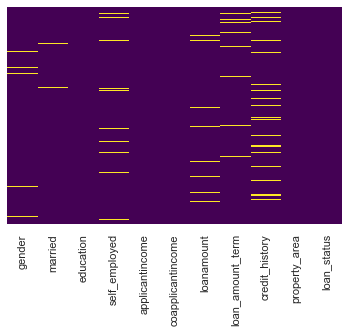

In [122]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
#i used the seaborn heatmap to visualize null values in each column

* * * * from the visualization above we have missing values in gender,dependents,self-employed,loanAmount,loan-amount-term,credit-history

5. Encode the categorical data. (2)

In [123]:
from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes('object').columns:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

In [124]:
data

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1


6. Separate the target and independent features and split the data into train
and test. (2)

In [130]:
x=data.drop('self_employed',axis=1)
y=data['self_employed']

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=1)

7. Build any classification model to predict the loan status of the customer
and save your model using pickle. (3)

In [132]:
pickle.dump(model,open('model.pkl','wb'))

In [133]:
model = pickle.load(open('model.pkl','rb'))
print(model)

LogisticRegression()


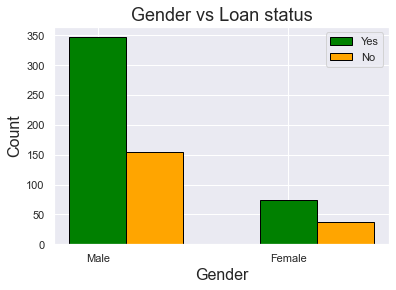

In [134]:
#Relationship between Gender and Loan Status:

Gender = ['Male', 'Female']
Loan_Status = ['Yes', 'No']
pos= np.arange(len(Gender))
bar_width= 0.30
Loan_Status_Yes= [347,75]
Loan_Status_NO= [155,37]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Gender)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

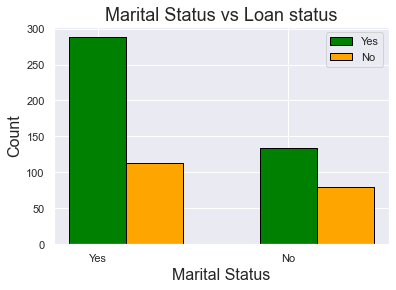

In [135]:
#Relationship between marital status vs loan status

MaritalStatus=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(MaritalStatus))
bar_width=0.30
Loan_Status_Yes=[288,134]
Loan_Status_NO=[113,79]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, MaritalStatus)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Marital Status vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

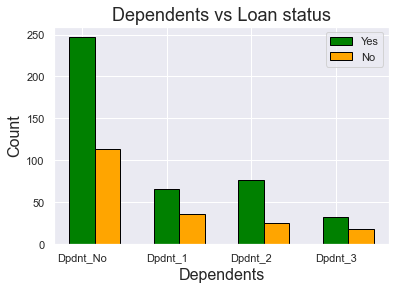

In [136]:
#Relationship between Dependents vs Loan status


Dependents=['Dpdnt_No', 'Dpdnt_1', 'Dpdnt_2', 'Dpdnt_3']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Dependents))
bar_width=0.30
Loan_Status_Yes=[247,66,76,33]
Loan_Status_NO=[113,36,25,18]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Dependents)
plt.xlabel('Dependents', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Dependents vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

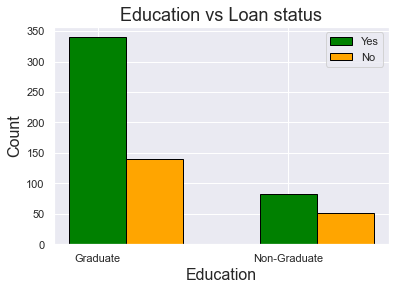

In [137]:
#Relationship between education vs Loan status:


Education=['Graduate', 'Non-Graduate']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Education))
bar_width=0.30
Loan_Status_Yes=[340,82]
Loan_Status_NO=[140,52]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Education)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Education vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

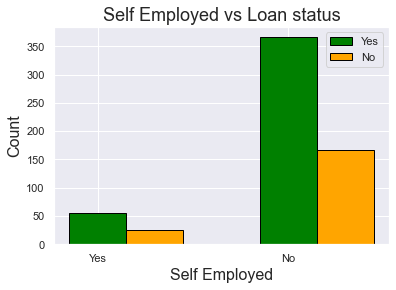

In [138]:
#Relationship between Self-Employed vs Loan_Status:

Self_Employed=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Self_Employed))
bar_width=0.30
Loan_Status_Yes=[56,366]
Loan_Status_NO=[26,166]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Self_Employed)
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Self Employed vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

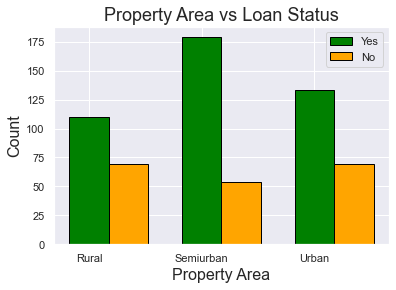

In [139]:
#Relationship between Property area and loan status

Property_Area=['Rural','Semiurban','Urban']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Property_Area))
bar_width=0.35
Loan_Status_Yes=[110,179,133]
Loan_Status_NO=[69,54,69]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Property_Area)
plt.xlabel('Property Area', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Property Area vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

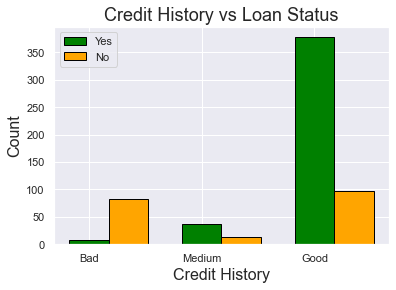

In [140]:
#Relationship between Credit History and Loan Status: 

Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=2)
plt.show()

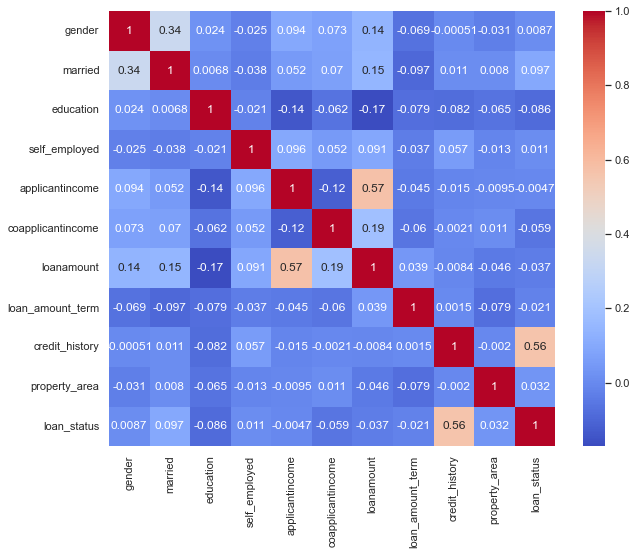

In [141]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');

In [156]:
# print out column with unique values
for col in data.columns:
    if data[col].dtypes == 'object':
        num_of_unique_cat = len (data[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

In [161]:
data['self_employed'].replace({'yes':1,'no':0},inplace=True)
data['married'].replace({'yes':1,'no':0},inplace=True)
data['gender'].replace({'male':1,'female':0},inplace=True)
data['education'].replace({'graduate':1,'not graduate':0},inplace=True)
data['property_area'].replace({'urban':2,'semiurban':1,'rural':0},inplace=True)
data['loan_status'].replace({'y':1,'n':0},inplace=True)

In [163]:
y = data['loan_status'] #target
X = data.drop('loan_status', axis = 1) #prediators

In [164]:
#Standardize the data - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)